<style>
    h1 {
        padding: 8px 8px;
        background-image: linear-gradient(135deg, #c9f3ff, rgb(131, 218, 255));
        font-weight: 700;
        position: static;
        text-align: center;
        color: #006098;
        font-size: 36px;
    }
    h2 {
        font-weight: 700;
        text-align: center;
        font-style: italic;
        font-size: 24px;
    }
</style>

<div><h1>THỰC HÀNH TRỰC QUAN HÓA DỮ LIỆU</h1></div>
<div><h2>ILab 01: Principal Components Analysis (PCA)</h2></div>

# **THÔNG TIN CÁ NHÂN**
- Họ và tên sinh viên: **Nguyễn Đặng Đăng Khoa**

- Mã số sinh viên: **21120179**

# **KHAI BÁO THƯ VIỆN CẦN THIẾT**

In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

# **BÁO CÁO**

## **Tìm hiểu về PCA**

### **_Bối cảnh_**

Khi thao tác và quan sát với bộ dữ liệu có kích thước chiều quá lớn thường gặp một số vấn đề:
- Khó diễn giản bằng biểu đồ trực quan;
- Quan sát bộ dữ liệu trong biểu đồ đa chiều gây khó khăn phân tích đưa ra thông tin có ích;
- Khó kiểm sát mối quan hệ giữa các cặp thuộc tính về thông tin tương quan: tương quan mạnh, tương quan yếu hoặc không có sự tương quan;
- Một số thuộc tính dường như có sự tương quan yếu không đưa ra thông tin hữu ích khiến cấu trúc nội tại của dữ liệu có số chiều bị tăng lên;
- Tính toán, xử lý dữ liệu khó khăn và phức tạp, tốn thời gian...

Để giải quyết vấn đề trên, chúng ta sẽ nén dữ liệu, làm cho dữ liệu nhỏ gọn hơn bằng cách giảm chiều của dữ liệu. Và một trong những thuật toán hỗ trợ vấn đề này là **Principal Components Analysis (PCA)**.

### **_PCA là gì?_**

**Principal Components Analysis (PCA)**
- Chuyển dữ liệu từ $n$ chiều sang dữ liệu $m$ chiều $(m<n)$ mà vẫn giữ được nhiều thông tin nhất có thể.
- Là một thuật toán giảm chiều dữ liệu dựa trên tính chất tuyến tính của dữ liệu.

### **_Nền tảng toán của thuật toán_**

Để cài đặt PCA, ta quan tâm đến các giá trị sau:

#### _Phương sai (Variance) và Độ lệch chuẩn (Standard deviation)_

**Độ lệch chuẩn**: Khoảng cách trung bình của các điểm dữ liệu đến điểm trung tâm (thường sẽ tính giá trị trung bình `mean`, ngoài ra có thể tính bằng giá trị trung vị `median`).

$\displaystyle s = \sqrt{\frac{\sum_{i=1}^{n}{X_i-\overline{X}}}{n-1}}$

**Phương sai**: là một cách khác để đo độ lệch dữ liệu.

$\displaystyle var = s^2 = \frac{\sum_{i=1}^{n}{X_i-\overline{X}}}{n-1}$

Như ta đã biết, phương sai là một thông số chỉ ra mức độ phân tán của dữ liệu so với điểm trung tâm. Nếu phương sai càng lớn thì dữ liệu này càng cung cấp nhiều thông tin so với điểm trung tâm. Đây là một yếu tố quan trọng giúp thuật toán PCA giảm kích thước chiều dữ liệu mà vẫn dữ được lượng thông tin hữu ích nhiều nhất.

#### _Hiệp phương sai (Covariance) và Ma trận hiệp phương sai (Covariance matrix)_

**Hiệp phương sai**: Xem xét sự thay đổi của chiều dữ liệu $X$ và $Y$ với nhau.

$\displaystyle cov(X,Y) = \frac{\sum_{i=1}^{n}{(X_i-\overline{X})(Y_i-\overline{Y})}}{n-1}$

Nếu:
- $cov(X,Y) > 0 \Rightarrow$ Khi $X$ tăng thì $Y$ tăng;
- $cov(X,Y) < 0 \Rightarrow$ Khi $X$ tăng thì $Y$ giảm;
- $cov(X,Y) = 0 \Rightarrow$ $X$ và $Y$ là những thuộc tính độc lập nhau.

**Ma trận hiệp phương sai**: Giả sử tập dữ liệu có các chiều là $X_1, X_2, \dots, X_k$, với $k \in \mathbb{N}^*$, thì ta có:

$\displaystyle cov(X_1, X_2, \dots, X_k)=
\begin{pmatrix}
cov(X_1,X_1) & cov(X_1,X_2) & \dots & cov(X_1,X_k)\\
cov(X_2,X_1) & cov(X_2,X_2) & \dots & cov(X_2,X_k)\\
\vdots & \vdots & \ddots & \vdots\\
cov(X_k,X_1) & cov(X_k,X_2) & \dots & cov(X_k,X_k)\\
\end{pmatrix}$

Ví dụ:

In [2]:
example_df = pd.DataFrame(
    {
        "Chiều cao (m)": [1.0, 1.2, 1.4, 1.55, 1.7, 1.72, 1.75, 1.8],
        "Cân nặng (kg)": [31, 38, 42, 49, 56, 65, 68, 65],
        "Tuổi": [3, 5, 7, 9, 10, 15, 17, 18],
    }
)

example_df

,Chiều cao (m),Cân nặng (kg),Tuổi
0,1.00,31,3
1,1.20,38,5
2,1.40,42,7
3,1.55,49,9
4,1.70,56,10
5,1.72,65,15
6,1.75,68,17
7,1.80,65,18


In [3]:
example_df.describe().loc[['mean', 'count']]

,Chiều cao (m),Cân nặng (kg),Tuổi
mean,1.515,51.75,10.5
count,8.000,8.00,8.0


In [4]:
x_example = example_df["Chiều cao (m)"]
cov_mtr_x = np.sum(np.dot(x_example - x_example.mean(), np.transpose(x_example - x_example.mean())))/(x_example.shape[0] - 1.0)
cov_mtr_x

0.08451428571428574

Ma trận hiệp phương sai của dữ liệu:

In [5]:
# Cài đặt hàm sử dụng cho cả ma trận được lưu trong DataFrame hoặc mảng 2 chiều
def cal_covariance_matrix(X, ddof:np.uint64=1):
    def cal_covariance(x, y):
        return np.sum(np.dot(x - x.mean(), y - y.mean()))/(x.shape[0] - ddof)*1.
    
    _X_np = X
    if isinstance(X, (pd.Series, pd.DataFrame)):
        _X_np = _X_np.to_numpy()
        
    # Cách 1
    _cov_mtr = np.zeros((_X_np.shape[1], _X_np.shape[1]))
    for _i in range(X.shape[1]):
        for _j in range(X.shape[1]):
            _cov_mtr[_i,_j] = _cov_mtr[_j,_i] = cal_covariance(_X_np[:,_i], _X_np[:,_j])
            if _i == _j:
                break        
    return _cov_mtr

cal_covariance_matrix(example_df.to_numpy(), 1)

array([[8.45142857e-02, 3.87714286e+00, 1.49142857e+00],
       [3.87714286e+00, 1.93642857e+02, 7.60000000e+01],
       [1.49142857e+00, 7.60000000e+01, 3.14285714e+01]])

In [6]:
# Ngoài ra, dữ liệu lưu bằng DataFrame còn có hàm hỗ trợ tính ma trận hiệp phương sai
cov_matrix = example_df.cov(ddof=1)
cov_matrix

,Chiều cao (m),Cân nặng (kg),Tuổi
Chiều cao (m),0.084514,3.877143,1.491429
Cân nặng (kg),3.877143,193.642857,76.000000
Tuổi,1.491429,76.000000,31.428571


Quan sát ma trận hiệp phương sai ở trên ta thấy có những giá trị ngoài đường chéo chính vượt trội hơn hẳn giá trị trên đường chéo chính khiến ta cảm giác giá trị này không ổn để quan sát tương quan giữa các chiều. Lý do gây ra điều này là bởi chúng không đồng bộ trên 01 đơn vị đo duy nhất. Vì vậy ta cần chuẩn hóa dữ liệu nếu muốn ma trận hiệp phương sai phản ánh chính xác hơn về sự tương quan.

#### _Ma trận tương quan (Correlation matrix)_

**Ma trận tương quan**: Cách biểu diễn khác của ma trận hiệp phương sai thông qua tính toán phương sai trên bộ dữ liệu đã được chuẩn hóa.

In [7]:
# Chuẩn hóa dữ liệu
def normalize(X, ddof:np.uint64=1):
    _mean = np.mean(X, axis=0)
    _std = np.std(X, axis=0, ddof=ddof)
    _std_filled = _std.copy()
    _std_filled[(_std==0.0) | (_std==np.NaN)] = 1.
    return np.divide(np.subtract(X, _mean), _std_filled), _mean, _std_filled

In [8]:
normalized_df = normalize(example_df, 1)[0]
normalized_df

,Chiều cao (m),Cân nặng (kg),Tuổi
0,-1.771504,-1.491136,-1.337824
1,-1.083541,-0.988102,-0.981071
2,-0.395579,-0.700654,-0.624318
3,0.120393,-0.197620,-0.267565
4,0.636366,0.305413,-0.089188
5,0.705162,0.952171,0.802694
6,0.808356,1.167757,1.159447
7,0.980347,0.952171,1.337824


Khi đã chuẩn hóa dữ liệu thì giá trị trung bình $\mu = 0$. Tức là:

$\begin{matrix}
cov(X,Y) & = & \displaystyle \frac{\sum_{i=1}^{n}{(X_i-\overline{X})(Y_i-\overline{Y})}}{n-1}\\\\
& = & \displaystyle \frac{\sum_{i=1}^{n}{(X_i)(Y_i)}}{n-1}\\\\
& = & \displaystyle \frac{XY}{n-1}\\\\
\Rightarrow cov_\mathbf{X} & = & \displaystyle \frac{\mathbf{X}^\top\mathbf{X}}{n-1}\\
\end{matrix}$

In [9]:
# Cài đặt hàm sử dụng cho cả ma trận được lưu trong DataFrame hoặc mảng 2 chiều
def cal_covariance_matrix(X, ddof:np.uint64=1):
    _X_np = X
    if isinstance(X, (pd.Series, pd.DataFrame)):
        _X_np = _X_np.to_numpy()
    
    # Cách 2
    _cov_mtr = np.divide(np.dot(_X_np.T, _X_np), (_X_np.shape[0] - ddof)*1.0)
    return _cov_mtr

cal_covariance_matrix(normalized_df.to_numpy(), 1)

array([[1.        , 0.95839822, 0.91511374],
       [0.95839822, 1.        , 0.9742054 ],
       [0.91511374, 0.9742054 , 1.        ]])

In [10]:
# Ngoài ra, dữ liệu lưu bằng DataFrame còn có hàm hỗ trợ tính ma trận tương quan mà không cần phải chuẩn hóa dữ liệu
corr_matrix = example_df.corr()
corr_matrix

,Chiều cao (m),Cân nặng (kg),Tuổi
Chiều cao (m),1.000000,0.958398,0.915114
Cân nặng (kg),0.958398,1.000000,0.974205
Tuổi,0.915114,0.974205,1.000000


#### _Vector riêng (Eignvectors)_

**Vector riêng**: Vector riêng của một ma trận là vector chỉ thay đổi về độ dài khi nhân với ma trận của nó.

Ví dụ:
$\text{Ma trận } \mathbf{X}=
\begin{pmatrix}
2 & 3\\
2 & 1\\
\end{pmatrix} \quad \text{và} \quad
\text{vectơ riêng } v=
\begin{pmatrix}
3\\
2\\
\end{pmatrix}$

Vector $v$ được gọi là vector riêng của ma trận $\mathbf{X}$ vì
$\begin{pmatrix}
2 & 3\\
2 & 1\\
\end{pmatrix}
\times
\begin{pmatrix}
3\\
2\\
\end{pmatrix}=
\begin{pmatrix}
12\\
8\\
\end{pmatrix}=4\times
\begin{pmatrix}
3\\
2\\
\end{pmatrix}$

In [11]:
mtr_example = np.array([[2,3],[2,1]])
vct_example = np.array([3,2])
assert np.allclose(np.dot(mtr_example, vct_example), 4*vct_example)

Công việc xác định vector riêng đã được hỗ trợ bởi thư viện.

In [13]:
# Xác định vector riêng
def identify_eigen(mtr):
    _eigenvalues, _eigenvectors = np.linalg.eig(mtr)
    _sorted_index = np.argsort(_eigenvalues)[::-1]
    return _eigenvalues[_sorted_index], _eigenvectors[:,_sorted_index]
    
identify_eigen(mtr_example)

(array([ 4., -1.]),
 array([[ 0.83205029, -0.70710678],
        [ 0.5547002 ,  0.70710678]]))

## **Cài đặt thuật toán PCA**

Đầu vào:
- `dataset`: Tập dữ liệu gốc ban đầu chưa được qua chuẩn hóa, mọi điểm trong tập dữ liệu này phải là kiểu số (số nguyên hay số thực).
- `n_cmps`: Là số chiều/số thành phần (component) mà người dùng mong muốn giảm từ số chiều của dữ liệu gốc `dataset` về `n_cmps`.

Đầu ra: Ma trận sau khi đã được nén tập dữ liệu `dataset` để giảm kích thước về `n_cmps` chiều.

Các bước để thực hiện PCA cho tập dữ liệu:
1. Chuẩn hóa tập dữ liệu `dataset`.
2. Tính ma trận hiệp phương sai.
3. Tính giá trị riêng $\lambda$ và vectơ riêng $V$ cho ma trận hiệp phương sai. Chọn các vectơ riêng gắn với `n_cmps` giá trị riêng lớn nhất làm cơ sở của không gian chiếu.
4. Tính toán phép chiếu trực giao của dữ liệu lên không gian chiếu được kéo dài bởi các cột của vector riêng.

In [23]:
# PCA for 2 components
def PCA_algorithm(dataset, n_cmps):         
    # Normalize dataset
    _normalized_dataset = dataset
    if isinstance(dataset, (pd.DataFrame, pd.Series)):
        _normalized_dataset = dataset.to_numpy()
    
    _normalized_dataset, _mean, _std = normalize(_normalized_dataset)
    
    # Calculate covariance matrix
    _cov = cal_covariance_matrix(_normalized_dataset)
    
    # Calculate eigenvalues and eigenvectors
    _eig_vals, _eig_vecs = identify_eigen(_cov)
    _eig_vals, _eig_vecs = _eig_vals[:n_cmps], _eig_vecs[:,:n_cmps]
    
    # Project
    _projection = np.dot(np.dot(_eig_vecs, np.linalg.inv(np.dot(_eig_vecs.T, _eig_vecs))), _eig_vecs.T)
    return (np.dot(_normalized_dataset, _projection) * _std + _mean)[:,:n_cmps]

In [22]:
# URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Read data
iris_df = pd.read_csv(url, header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

iris_df.sample(5)

,sepal length,sepal width,petal length,petal width,target
9,4.9,3.1,1.5,0.1,Iris-setosa
114,5.8,2.8,5.1,2.4,Iris-virginica
46,5.1,3.8,1.6,0.2,Iris-setosa
108,6.7,2.5,5.8,1.8,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica


In [24]:
pca_iris = PCA_algorithm(iris_df.iloc[:,:-1], 2)
new_iris_df = pd.DataFrame(pca_iris,
                           columns=['Principal component 1', 'Principal component 2'])
new_iris_df = pd.concat([new_iris_df, iris_df.iloc[:,-1]], axis=1)
new_iris_df

,Principal component 1,Principal component 2,target
0,5.022448,3.513992,Iris-setosa
1,4.742457,3.029306,Iris-setosa
2,4.724617,3.196108,Iris-setosa
3,4.673166,3.086103,Iris-setosa
4,5.020837,3.595753,Iris-setosa
...,...,...,...
145,6.767373,2.994239,Iris-virginica
146,6.237041,2.514527,Iris-virginica
147,6.580970,2.987627,Iris-virginica
148,6.749017,3.303876,Iris-virginica


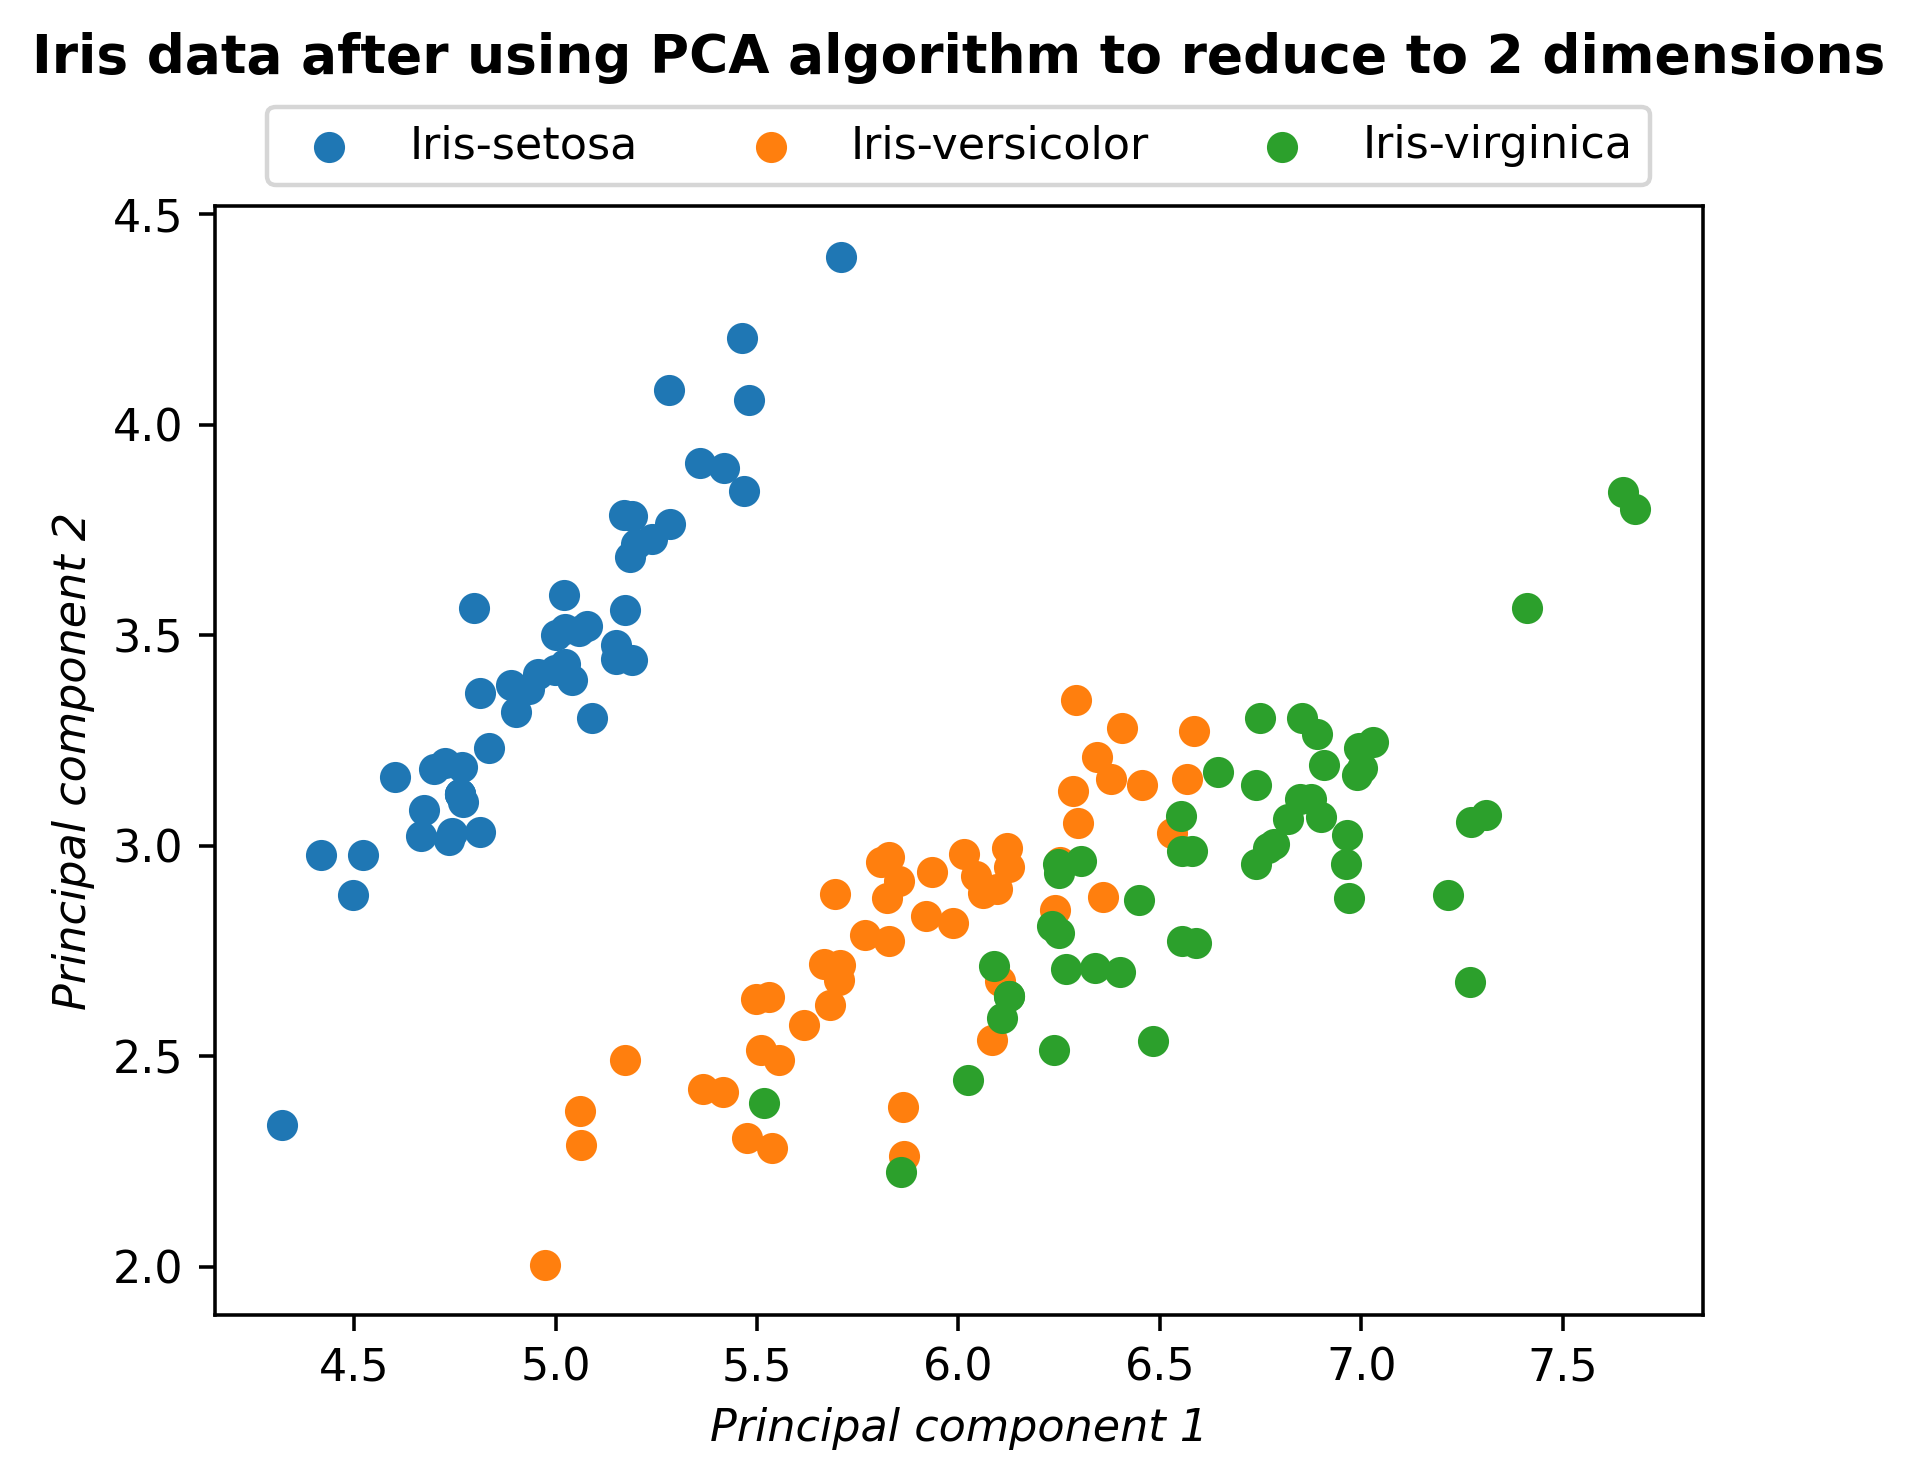

In [61]:
plt.figure(figsize=(6,4.5), dpi=320);
plt.scatter(new_iris_df[new_iris_df['target']=='Iris-setosa'].iloc[:,0], new_iris_df[new_iris_df['target']=='Iris-setosa'].iloc[:,1], label='Iris-setosa')
plt.scatter(new_iris_df[new_iris_df['target']=='Iris-versicolor'].iloc[:,0], new_iris_df[new_iris_df['target']=='Iris-versicolor'].iloc[:,1], label='Iris-versicolor')
plt.scatter(new_iris_df[new_iris_df['target']=='Iris-virginica'].iloc[:,0], new_iris_df[new_iris_df['target']=='Iris-virginica'].iloc[:,1], label='Iris-virginica')
plt.xlabel('Principal component 1', fontdict={'style':'italic'})
plt.ylabel('Principal component 2', fontdict={'style':'italic'})
plt.title('Iris data after using PCA algorithm to reduce to 2 dimensions', fontdict={'weight':'bold'}, pad=30)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.11), ncol=3, fancybox=True);

# Save the plot to PCA_example.svg
plt.savefig('PCA_example.svg');

Ta thấy sau khi giảm chiều, ta dễ dàng trực quan hóa dữ liệu trong nhiều chiều bằng biểu đồ 2D. Việc này giúp ta quan sát và rút trích một số thông tin thú vị của dữ liệu. Trong ví dụ trên, ta thấy loại "Iris-setosa" dễ dàng phân biệt hơn hẳn so với 2 loại còn lại; còn "Iris-versicolor" và "Iris-virginica" cũng có thể phân biệt được, nhưng có một số đặc điểm mà 2 loại hoa này có sự giống nhau hoặc tương tự nhau.